In [109]:
# Import modules.
import os
import pandas as pd
import numpy.random as rnd
from dotenv import load_dotenv
import requests
import warnings
import json
warnings.filterwarnings('ignore')

In [110]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ["XLC", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLB", "XLRE", "XLK", "XLU"]
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

Y = data[assets].pct_change().dropna()

display(Y)

[*********************100%***********************]  11 of 11 completed


,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2018-06-20,-0.3249%,1.2410%,0.4415%,-0.2559%,0.0683%,0.2100%,0.0979%,1.0794%,0.0797%,0.2121%,0.4741%
2018-06-21,-1.0635%,-0.6129%,-1.8516%,-0.2933%,-1.2554%,-0.7684%,0.1957%,0.5967%,0.3385%,-0.5762%,-0.7123%
2018-06-22,1.4563%,0.4376%,1.9951%,-0.4779%,0.3455%,-0.3238%,0.8202%,0.8742%,0.6944%,0.4494%,-0.1704%
2018-06-25,-1.5550%,-2.0598%,-2.0093%,-1.0713%,-1.2670%,-2.0763%,0.5036%,-0.2476%,1.6552%,-0.9184%,-2.1739%
2018-06-26,0.3819%,0.1658%,1.2629%,-0.3361%,0.3766%,0.4039%,-0.4240%,0.5275%,0.1163%,-0.3090%,0.7163%
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-20,0.4853%,0.3106%,0.9592%,0.1175%,0.4601%,0.5806%,0.7553%,0.7721%,0.6875%,0.7080%,0.1528%
2019-12-23,0.2792%,-0.2596%,1.0267%,-0.2282%,0.8227%,0.2859%,-0.4279%,-0.6015%,-0.9289%,0.3992%,-0.2328%
2019-12-24,0.1147%,-0.0186%,-0.0484%,0.2287%,-0.4019%,0.0329%,0.1273%,0.1315%,0.1406%,-0.1261%,0.2253%


In [111]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Utility' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 50 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
weights,1.5585%,3.2018%,0.0001%,17.1965%,0.0002%,0.0000%,21.7815%,3.2326%,46.5024%,5.2836%,1.2428%


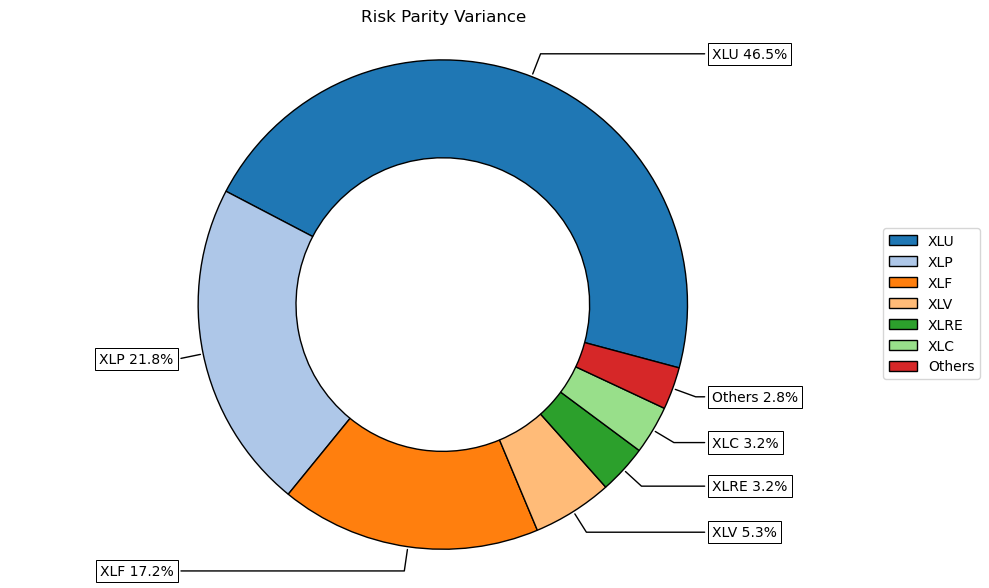

In [112]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w,
                 title='Risk Parity Variance',
                 others=0.05,
                 nrow=25,
                 cmap = "tab20",
                 height=6,
                 width=10,
                 ax=None)

# Risk Parity Model

In [113]:
asset_classes = {'Assets': ["XLC", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLB", "XLRE", "XLK", "XLU"], 
                 'Industry': ['Communication Services','Consumer Discretionary', 'Consumer Staples', 'Energy', 'Financials', 'Health Care',
                              'Industrials','Materials','Real Estate','Technology','Utilities']}

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])
asset_classes.reset_index(inplace=True, drop=True)

# Risk contribution constraints vector based on Industry Class
b = rp.risk_constraint(asset_classes,
                       kind='vanilla',
                       classes_col='Industry')

display(asset_classes)
display(b)

,Assets,Industry
0,XLB,Materials
1,XLC,Communication Services
2,XLE,Energy
3,XLF,Financials
4,XLI,Industrials
5,XLK,Technology
6,XLP,Consumer Staples
7,XLRE,Real Estate
8,XLU,Utilities
9,XLV,Health Care


array([[0.09090909],
       [0.09090909],
       [0.09090909],
       [0.09090909],
       [0.09090909],
       [0.09090909],
       [0.09090909],
       [0.09090909],
       [0.09090909],
       [0.09090909],
       [0.09090909]])

In [114]:
w_rp = port.rp_optimization(model=model, rm=rm, rf=rf, b=b, hist=hist)

display(w_rp.T)

,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
weights,7.7869%,7.1833%,7.4294%,8.0615%,7.2601%,6.0581%,11.4833%,11.5219%,17.4559%,8.4655%,7.2941%


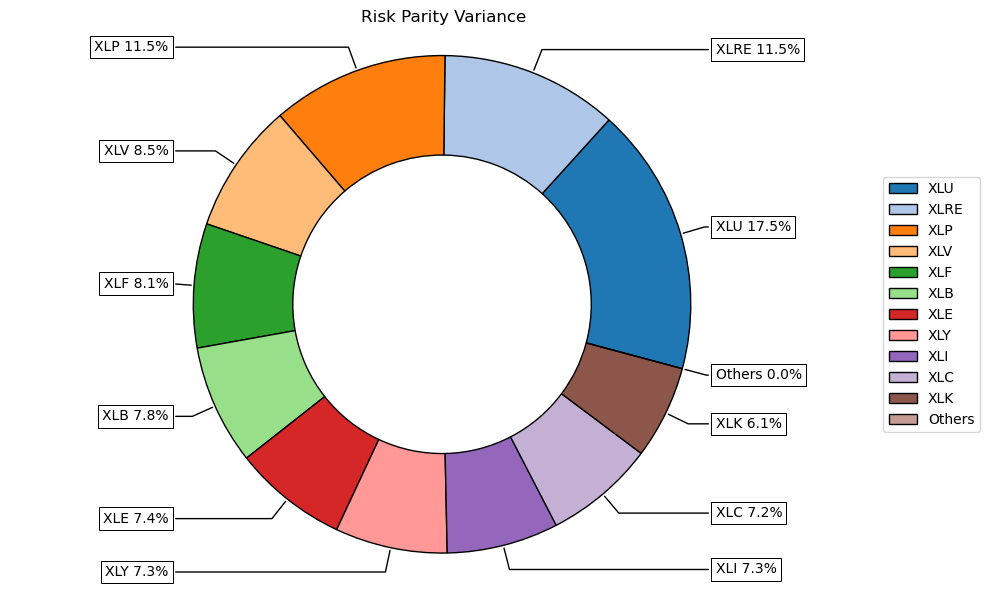

In [115]:
ax = rp.plot_pie(w=w_rp,
                 title='Risk Parity Variance',
                 others=0.05,
                 nrow=25,
                 cmap = "tab20",
                 height=6,
                 width=10,
                 ax=None)

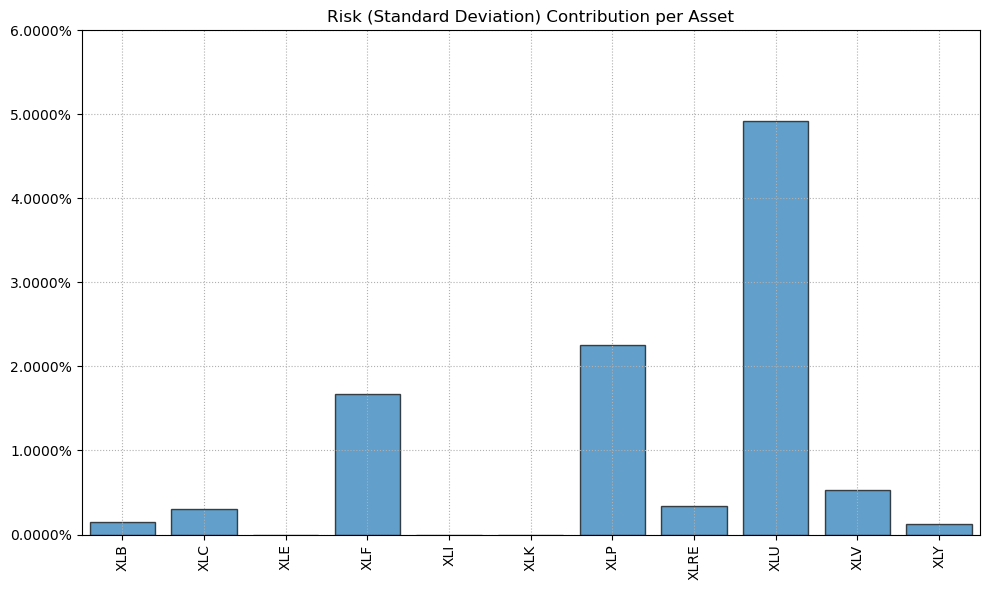

In [116]:
ax = rp.plot_risk_con(w, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=None)